In [2]:
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline

import glob
from astropy.io import fits
from scipy.ndimage import interpolation as interp


from skimage.feature.register_translation import (register_translation, _upsampled_dft)

from photutils import datasets
from photutils import DAOStarFinder
from astropy.stats import mad_std
from photutils import aperture_photometry, CircularAperture, CircularAnnulus


array([[ 1.01618520e+04,  2.61122895e+02,  2.45189498e+02, ...,
         3.04910327e+02,  2.94579317e+04,  2.93616404e+04],
       [ 1.03162668e+04,  2.64561610e+02,  2.61962700e+02, ...,
         2.90272307e+02,  2.93651906e+04,  2.91827213e+04],
       [ 1.02007101e+04,  2.62341308e+02,  2.69187986e+02, ...,
         2.96814186e+02,  2.90899314e+04,  2.91827213e+04],
       ...,
       [ 9.47799678e+03,  2.33501954e+02,  2.30738582e+02, ...,
         4.40080105e+02,  2.56387692e+04,  2.57785397e+04],
       [ 9.74629869e+03,  2.59858801e+02,  2.51449294e+02, ...,
         4.34211750e+02,  2.55006280e+04,  2.59367700e+04],
       [ 8.40775996e+03, -3.89932355e+01, -2.76036183e+01, ...,
        -1.03570948e+03,  2.08008294e+03,  2.09440023e+03]])

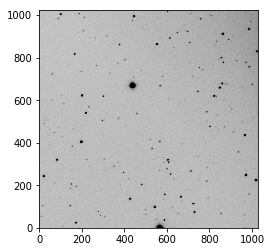

In [3]:
quad = fits.getdata('/Users/megankokoris1/Desktop/quadRU.fits') 
plt.imshow(quad, cmap='gray_r', origin='lower', vmin=0, vmax=1000)
quad

In [33]:
bkg_sigma = mad_std(quad)
daofind = DAOStarFinder(fwhm=6, threshold=5.*bkg_sigma)
sources = daofind(quad) 

for col in sources.colnames:  
    sources[col].info.format = '%.8g'  # for consistent table output
print(sources)

 id xcentroid ycentroid sharpness  ... sky    peak      flux       mag     
--- --------- --------- ---------- ... --- --------- --------- ------------
  1 562.42674 1.5587044  0.3538506 ...   0 61100.457 894.70389   -7.3791983
  2 634.01092 5.9029444 0.43012744 ...   0 398.49193 1.7169526  -0.58689578
  3 111.56855 8.8568322 0.43035529 ...   0 403.00637 1.9418851  -0.72055884
  4 172.87518 24.840084 0.46267388 ...   0 3875.4179 50.728983   -4.2631404
  5 121.11346 28.714652 0.30654936 ...   0 333.82154  1.354601  -0.32952847
  6 587.60962 36.736467 0.47637625 ...   0 2162.5629 25.226353   -3.5046362
  7 964.46194 39.021762 0.67326675 ...   0 395.74794 1.2011803  -0.19902053
  8 550.61108 40.489314 0.50715856 ...   0 757.52838 6.0912297   -1.9617624
  9 719.47892 49.023245 0.63921868 ...   0 377.71293 1.3316217  -0.31095217
 10  10.48977 53.152241 0.46128052 ...   0 587.57528 4.7378909   -1.6889626
...       ...       ...        ... ... ...       ...       ...          ...
260 463.6897

In [5]:
positions = (sources['xcentroid'], sources['ycentroid'])
apertures = CircularAperture(positions, r=4.) 
phot_table1 = aperture_photometry(quad, apertures)
for col in phot_table1.colnames:  
    phot_table1[col].info.format = '%.8g'  # for consistent table output
print(phot_table1)  

 id  xcenter   ycenter  aperture_sum
       pix       pix                
--- --------- --------- ------------
  1 562.42674 1.5587044    2199257.6
  2 634.01092 5.9029444    16561.129
  3 111.56855 8.8568322    16382.789
  4 172.87518 24.840084     86386.78
  5 121.11346 28.714652    14818.321
  6 587.60962 36.736467    53555.173
  7 964.46194 39.021762     16235.68
  8 550.61108 40.489314    24002.823
  9 719.47892 49.023245    15198.809
 10  10.48977 53.152241    19549.925
...       ...       ...          ...
261 212.07726 987.83981    24393.943
262 800.51772 991.36375     17979.71
263  445.5082 993.16959    199823.79
264 802.68628 998.53929    24962.021
265 993.83419 1002.0432    23374.283
266 101.84033 1003.1022    99775.201
267 187.40569 1005.4334    26545.458
268 713.35889 1006.9349    23245.867
269 602.79027 1014.1157    27986.512
270 171.75988  1018.676    11481.475
Length = 270 rows


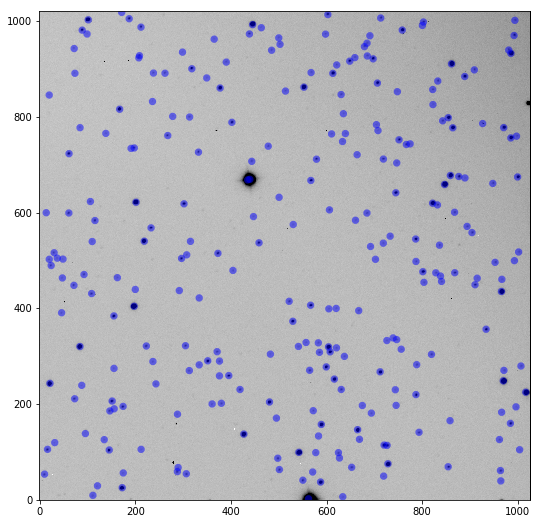

In [6]:
plt.figure(figsize=(10,9))
plt.imshow(quad, cmap='gray_r', origin='lower', vmin=0, vmax=1000)
apertures.plot(color='blue', lw=3.5, alpha=0.5)

In [7]:
annulus_apertures = CircularAnnulus(positions, r_in=5., r_out=10.)
phot_table = aperture_photometry(quad, annulus_apertures)
for col in phot_table.colnames:  
    phot_table[col].info.format = '%.8g'  # for consistent table output
print(phot_table)  

 id  xcenter   ycenter  aperture_sum
       pix       pix                
--- --------- --------- ------------
  1 562.42674 1.5587044    1469666.1
  2 634.01092 5.9029444     55025.31
  3 111.56855 8.8568322    61076.297
  4 172.87518 24.840084      72769.6
  5 121.11346 28.714652    61246.007
  6 587.60962 36.736467     72263.58
  7 964.46194 39.021762    66782.145
  8 550.61108 40.489314    67674.169
  9 719.47892 49.023245    62990.625
 10  10.48977 53.152241    61847.655
...       ...       ...          ...
261 212.07726 987.83981    60467.641
262 800.51772 991.36375    90157.734
263  445.5082 993.16959    92783.317
264 802.68628 998.53929    84682.338
265 993.83419 1002.0432    95024.709
266 101.84033 1003.1022    71088.616
267 187.40569 1005.4334    61216.844
268 713.35889 1006.9349     75657.23
269 602.79027 1014.1157    62395.546
270 171.75988  1018.676    36190.869
Length = 270 rows


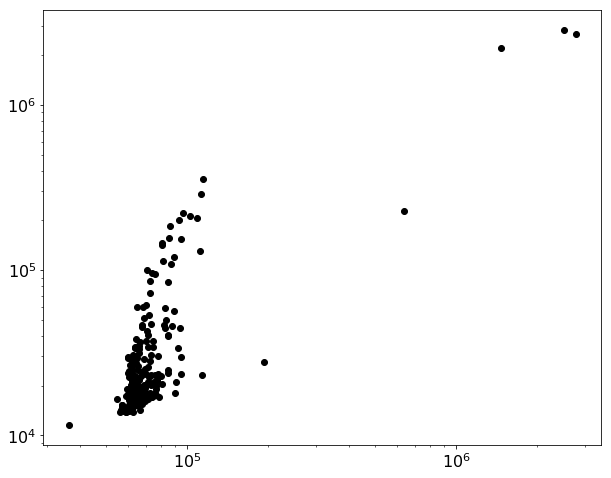

In [8]:
a = phot_table['aperture_sum']
b = phot_table1['aperture_sum']

plt.figure(figsize=(10, 8))
plt.rcParams['font.size'] = 16

plt.loglog(a, b, 'ko')

plt.show()

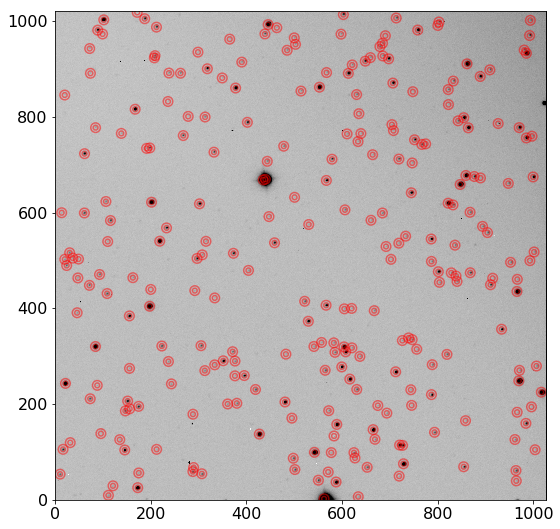

In [9]:
plt.figure(figsize=(10,9))
plt.imshow(quad, cmap='gray_r', origin='lower', vmin=0, vmax=1000)
annulus_apertures.plot(color='red', lw=1.5, alpha=0.5)

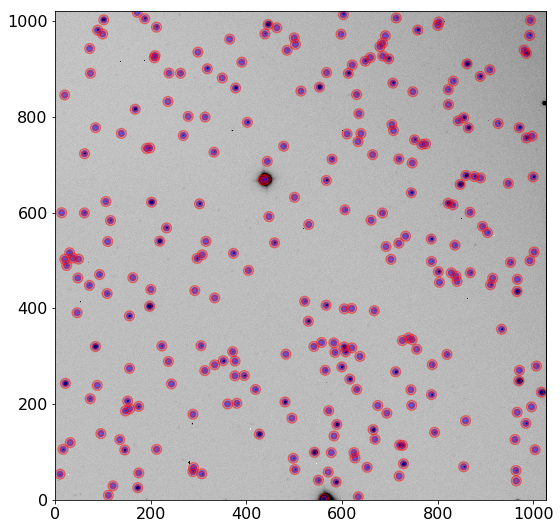

In [10]:
plt.figure(figsize=(10,9))
plt.imshow(quad, cmap='gray_r', origin='lower', vmin=0, vmax=1000)
apertures.plot(color='blue', lw=3.5, alpha=1.5)
annulus_apertures.plot(color='red', lw=1.5, alpha=0.5)
plt.show()

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from photutils.datasets import (make_random_gaussians_table,
                                make_noise_image,
                                make_gaussian_sources_image)
from photutils.psf import (IterativelySubtractedPSFPhotometry,
                           BasicPSFPhotometry)
from photutils import MMMBackground
from photutils.psf import IntegratedGaussianPRF, DAOGroup
from photutils.detection import DAOStarFinder
from photutils.detection import IRAFStarFinder
from astropy.table import Table
from astropy.modeling.fitting import LevMarLSQFitter

In [44]:
daogroup = DAOGroup(crit_separation=8)
sigma_psf = 3
mmm_bkg = MMMBackground()
#iraffind = IRAFStarFinder(threshold=2.5*mmm_bkg(quad), fwhm=5)
#daofind = DAOStarFinder(fwhm=6, threshold=5.*bkg_sigma)
fitter = LevMarLSQFitter()
psf_model = IntegratedGaussianPRF(sigma=sigma_psf)
# gaussian_prf = IntegratedGaussianPRF(sigma=2.05)
# gaussian_prf.sigma.fixed = False
len(sources)
itr_phot_obj = IterativelySubtractedPSFPhotometry(finder=daofind,
                                                  group_maker=daogroup,
                                                  bkg_estimator=mmm_bkg,
                                                  psf_model=psf_model,
                                                  fitter=fitter,
                                                  fitshape=(11, 11),
                                                  niters=1)

In [45]:
phot_results = itr_phot_obj(quad)

In [57]:
phot_table2=phot_results['id', 'group_id', 'iter_detected', 'x_0', 'y_0', 'flux_0'] 
len(phot_table2)
b = phot_table2['flux_0'][0:270]


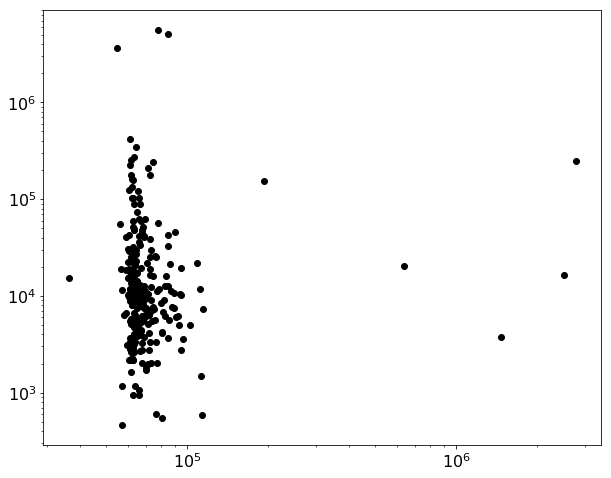

In [54]:
a = phot_table['aperture_sum']
#b = phot_table2['flux_0']

plt.figure(figsize=(10, 8))
plt.rcParams['font.size'] = 16

plt.loglog(a, b, 'ko')

plt.show()

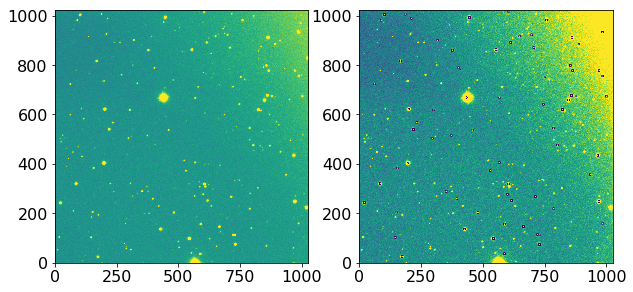

In [15]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
ax1.imshow(quad, origin='lower', vmin=0, vmax=500)
ax2.imshow(itr_phot_obj.get_residual_image(), cmap='viridis',
aspect=1, interpolation='nearest', origin='lower', vmin=-100, vmax=100) 
# ax2.plot(phot_table2['x_0'], phot_table2['y_0'], 'r.')